In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df = pd.read_csv('googleplaystore.csv')

In [6]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [8]:
print(df.shape)
df.head()
df.info()
df.describe()

(10841, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [20]:

if 10472 in df.index:
    df.drop(10472, inplace=True)
    print("Dropped row 10472 due to known issue.")
else:
    print("Row 10472 not found. Proceeding without drop.")

df = df[df['Rating'] <= 5]
def convert_size(x):
    if 'M' in x:
        return float(x.replace('M','')) * 1024 * 1024
    elif 'k' in x:
        return float(x.replace('k','')) * 1024
    elif x == 'Varies with device':
        return np.nan
    return x

df['Size_in_bytes'] = df['Size'].apply(convert_size)
df['Size_MB'] = df['Size_in_bytes'] / (1024 * 1024)


Row 10472 not found. Proceeding without drop.


In [26]:

print("Original number of rows:", df.shape[0])

if 10472 in df.index:
    df.drop(10472, inplace=True)
    print("Dropped row 10472 due to known issue.")
else:
    print("Row 10472 not found. Proceeding without drop.")

invalid_ratings = df[df['Rating'] > 5]
print("Number of rows with invalid ratings (>5):", invalid_ratings.shape[0])

df = df[df['Rating'] <= 5]

print("Final number of rows after cleaning:", df.shape[0])


Original number of rows: 9366
Row 10472 not found. Proceeding without drop.
Number of rows with invalid ratings (>5): 0
Final number of rows after cleaning: 9366


In [30]:

missing_before = df['Rating'].isnull().sum()
print(f"Missing 'Rating' values before filling: {missing_before}")

group_means = df.groupby('Installs_category')['Rating'].mean()

for category, value in group_means.items():
    mask = (df['Installs_category'] == category) & (df['Rating'].isnull())
    count = mask.sum()
    df.loc[mask, 'Rating'] = value
    print(f"Filled {count} missing ratings in '{category}' category with value {value:.2f}")

missing_after = df['Rating'].isnull().sum()
print(f"Missing 'Rating' values after filling: {missing_after}")


Missing 'Rating' values before filling: 0
Filled 0 missing ratings in 'no' category with value nan
Filled 0 missing ratings in 'Very low' category with value 4.64
Filled 0 missing ratings in 'Low' category with value 4.17
Filled 0 missing ratings in 'Moderate' category with value 4.04
Filled 0 missing ratings in 'More than moderate' category with value 4.09
Filled 0 missing ratings in 'High' category with value 4.21
Filled 0 missing ratings in 'Very High' category with value 4.29
Filled 0 missing ratings in 'Top Notch' category with value 4.37
Missing 'Rating' values after filling: 0


In [18]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [20]:

df.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [22]:
df_cleaned = df.dropna(subset=['Rating'])

df_cleaned.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [32]:

df_cleaned = df.dropna(subset=['Rating'])

df_cleaned = df_cleaned[df_cleaned['Installs'].str.match(r'^[\d,]+$', na=False)]
df_cleaned['Installs'] = df_cleaned['Installs'].str.replace(',', '').astype(int)

df_cleaned = df_cleaned[df_cleaned['Price'] != 'Everyone']

df_cleaned['Price'] = df_cleaned['Price'].str.replace('$', '', regex=False)
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')

df_cleaned = df_cleaned[df_cleaned['Reviews'].str.isnumeric()]
df_cleaned['Reviews'] = df_cleaned['Reviews'].astype(int)

df_cleaned = df_cleaned.dropna(subset=['Price'])


df_cleaned.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [38]:

top_installed = df_cleaned.sort_values(by='Installs', ascending=False)[['App', 'Installs']].head()
print(top_installed)


Empty DataFrame
Columns: [App, Installs]
Index: []


In [42]:


avg_rating_per_category = df_cleaned.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(avg_rating_per_category.head())


Series([], Name: Rating, dtype: float64)


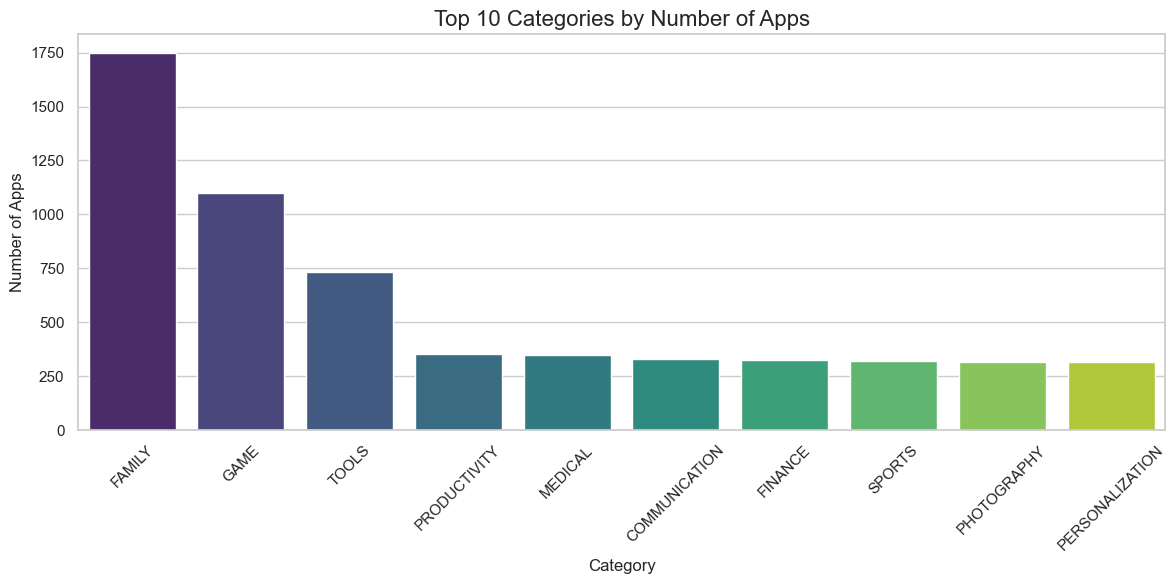

In [52]:
plt.figure(figsize=(12, 6))
top_categories = df_cleaned['Category'].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.title("Top 10 Categories by Number of Apps", fontsize=16)
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

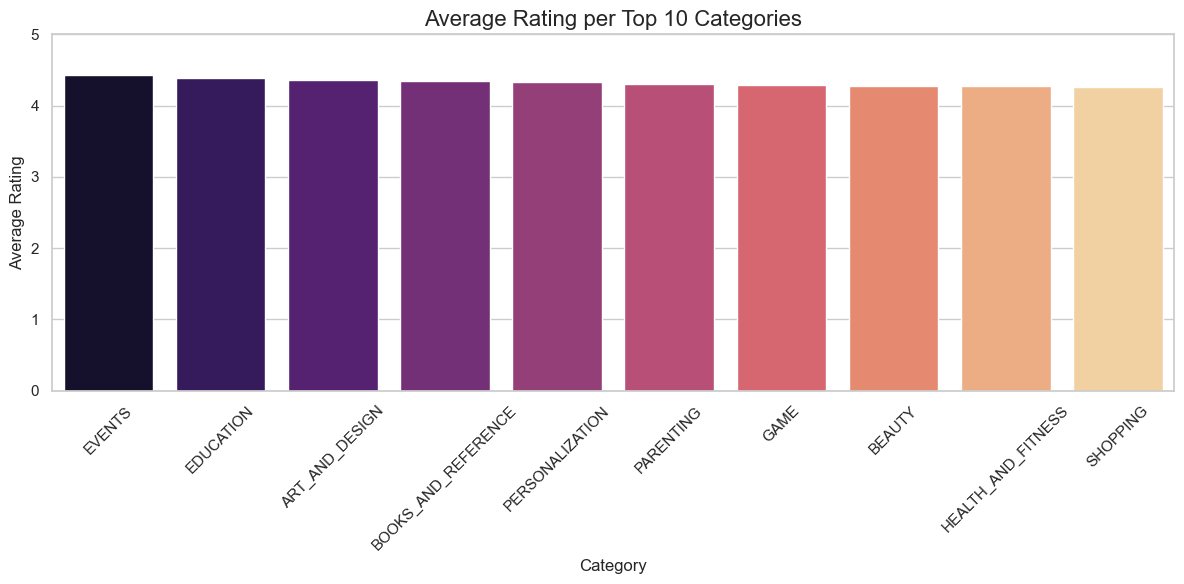

In [54]:
plt.figure(figsize=(12, 6))
avg_rating_top_categories = df_cleaned.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_rating_top_categories.index, y=avg_rating_top_categories.values, palette="magma")
plt.title("Average Rating per Top 10 Categories", fontsize=16)
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

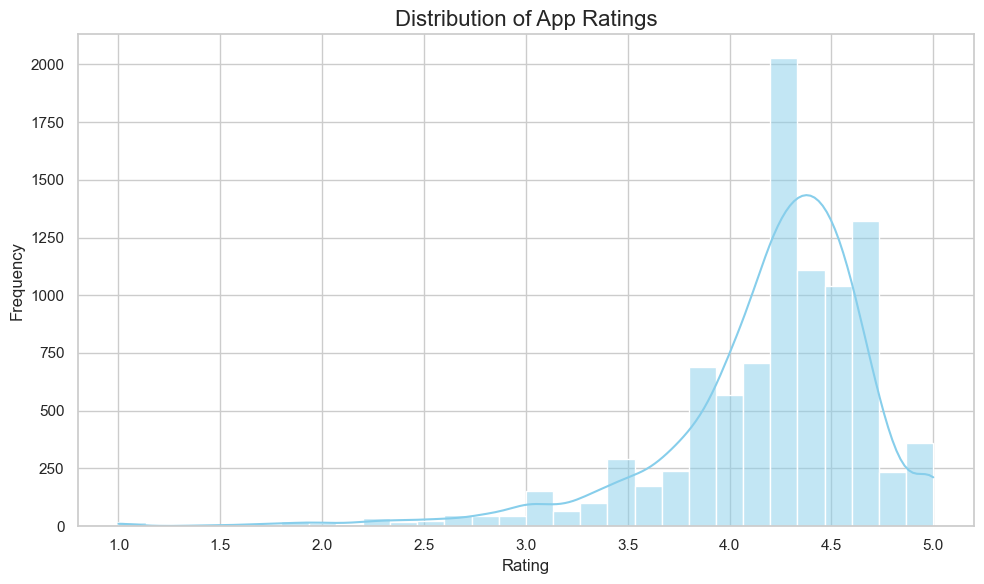

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Rating'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of App Ratings", fontsize=16)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


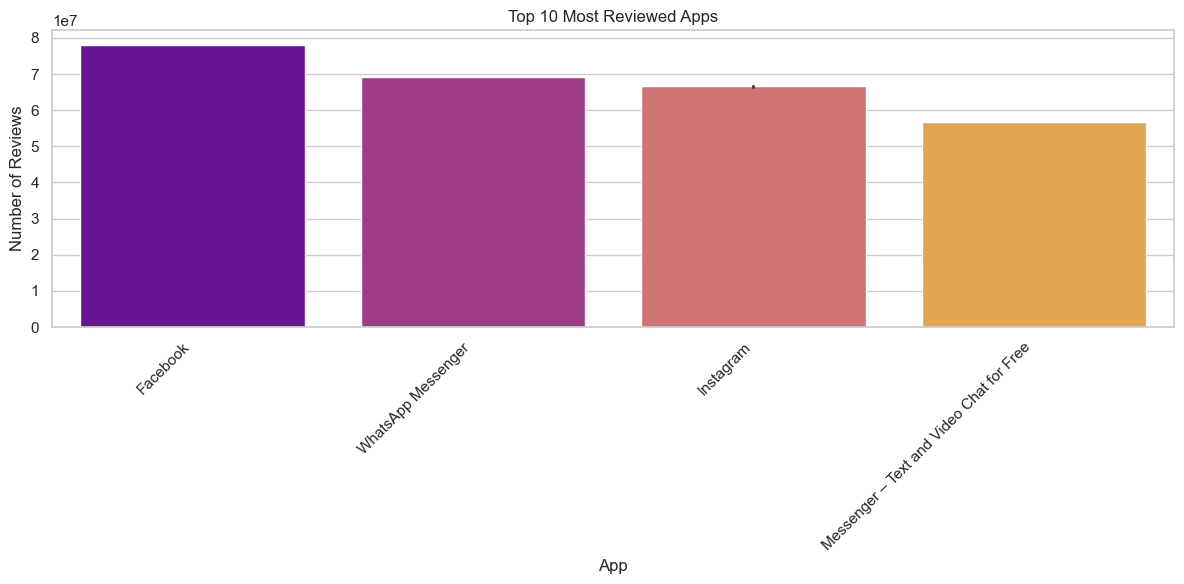

In [58]:
top_reviewed_apps = df_cleaned.sort_values(by='Reviews', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_reviewed_apps['App'], y=top_reviewed_apps['Reviews'], palette='plasma')
plt.title('Top 10 Most Reviewed Apps')
plt.xticks(rotation=45, ha='right')
plt.xlabel('App')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


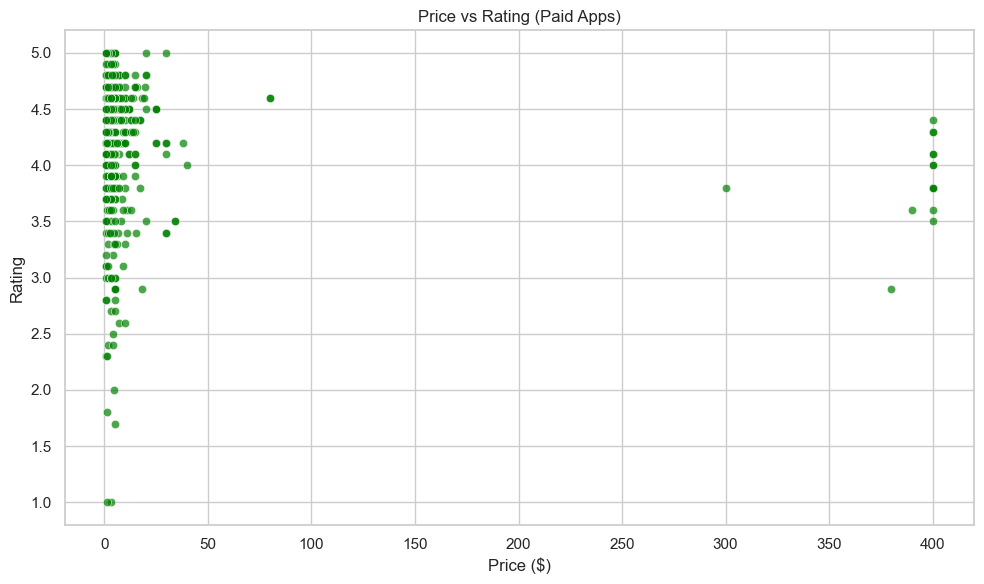

In [60]:
paid_apps = df_cleaned[df_cleaned['Price'] > 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=paid_apps, x='Price', y='Rating', alpha=0.7, color='green')
plt.title('Price vs Rating (Paid Apps)')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


In [64]:
print(df.describe())


print(df['Category'].value_counts())

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000
Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS  

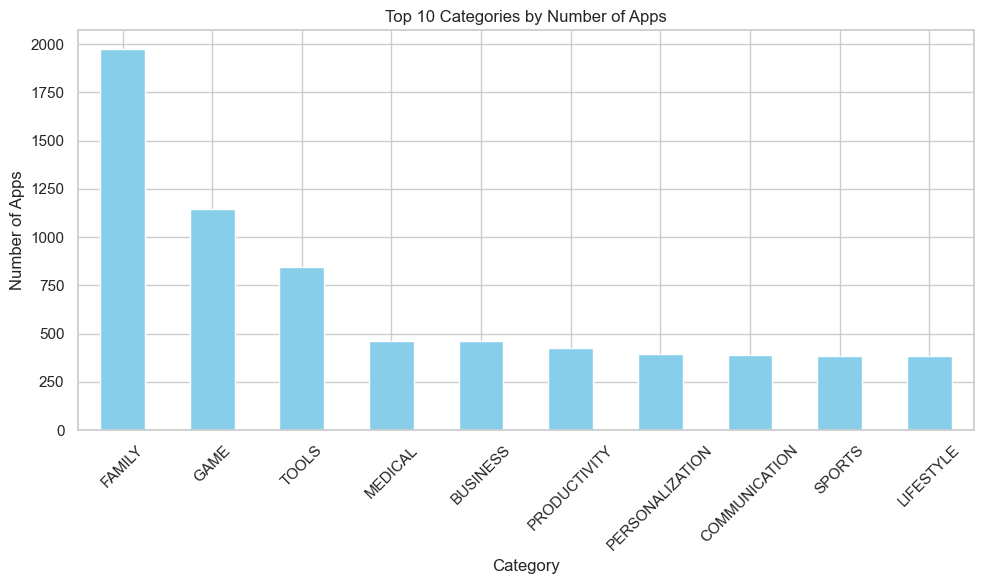

In [66]:
import matplotlib.pyplot as plt

top_categories = df['Category'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories by Number of Apps')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


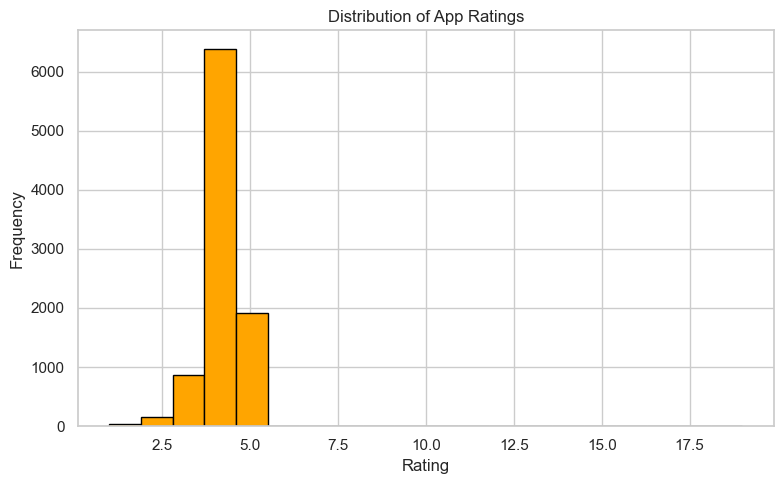

In [68]:
plt.figure(figsize=(8, 5))
df['Rating'].dropna().plot(kind='hist', bins=20, color='orange', edgecolor='black')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


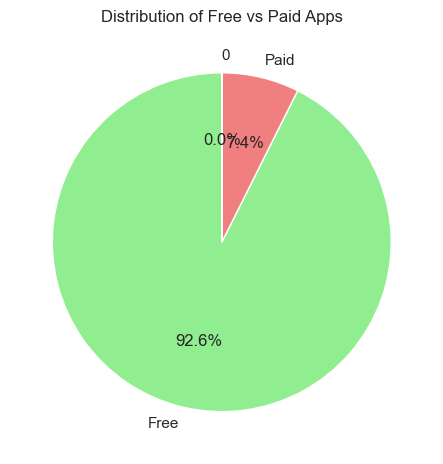

In [70]:
df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Free vs Paid Apps')
plt.ylabel('')
plt.tight_layout()
plt.show()
